In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from utility.utils import get_rebalance_dates, compute_weights_drift
from utility.types import RebalanceFrequency
from data.benchmark import Benchmark

In [3]:
bench = Benchmark()
benchmark = bench.get_benchmark_returns_data()
benchmark

,OISESTR,SPX,SX5T
Date,,,
2019-10-01,-0.000022,0.000000,0.000000
2019-10-02,-0.000022,-0.017903,-0.029827
2019-10-03,-0.000022,0.007972,0.001189
2019-10-04,-0.000022,0.014217,0.008586
2019-10-07,-0.000022,-0.004478,0.007117
...,...,...,...
2024-02-09,0.000155,0.000000,0.000000
2024-02-12,0.000155,0.004788,0.007551
2024-02-13,0.000155,-0.013674,-0.012024


# Benchmark comparaison


In [4]:
bench = Benchmark(RebalanceFrequency.DAILY)
benchmark = bench.get_benchmark_returns_data()
bench_perf_daily_rebal = bench.benchmark_perf

In [5]:
bench = Benchmark(RebalanceFrequency.MONTH_END)
benchmark = bench.get_benchmark_returns_data()
bench_perf_monthly_rebal = bench.benchmark_perf

In [6]:
bench = Benchmark(RebalanceFrequency.QUARTER_END)
benchmark = bench.get_benchmark_returns_data()
bench_perf_quarter_rebal = bench.benchmark_perf

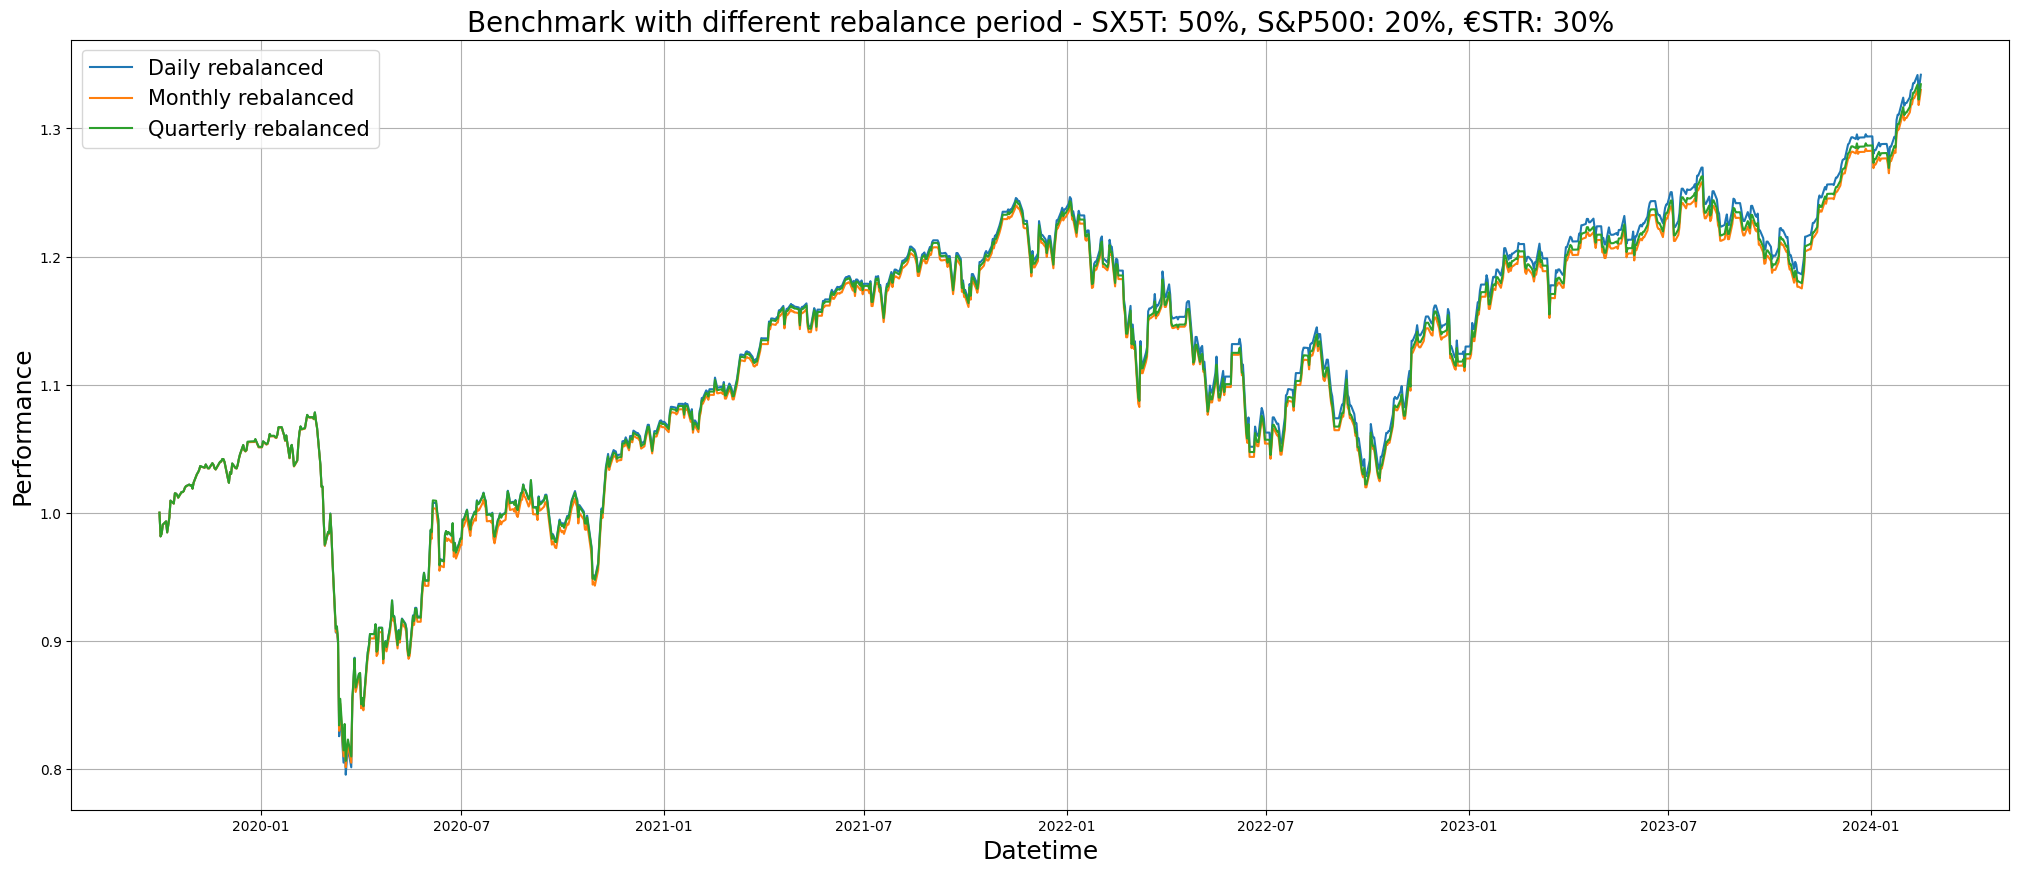

In [7]:
plt.figure(figsize=(25, 10))
plt.plot(bench_perf_daily_rebal, label="Daily rebalanced")
plt.plot(bench_perf_monthly_rebal, label="Monthly rebalanced")
plt.plot(bench_perf_quarter_rebal, label="Quarterly rebalanced")
plt.xlabel("Datetime", fontsize=18)
plt.ylabel("Performance", fontsize=18)
plt.title(
    "Benchmark with different rebalance period - SX5T: 50%, S&P500: 20%, €STR: 30%",
    fontsize=20,
)
plt.grid()
plt.legend(fontsize=15)

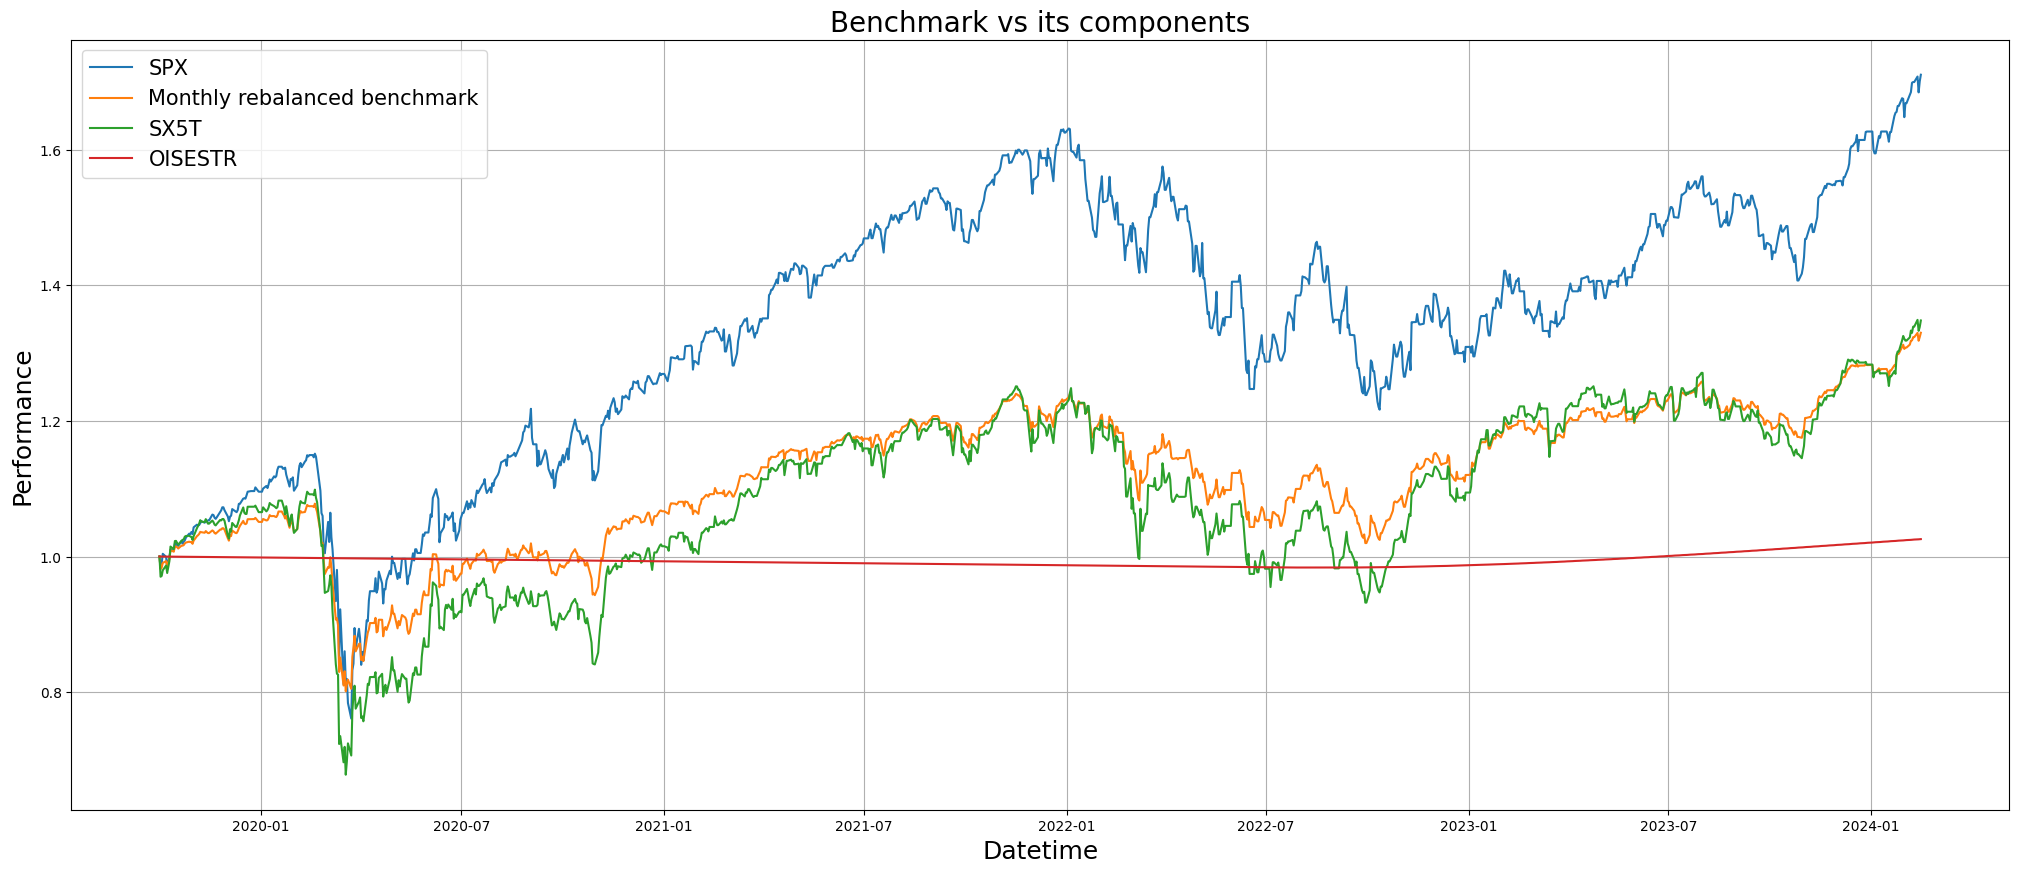

In [8]:
component = bench.get_benchmark_returns_data()
plt.figure(figsize=(25, 10))
plt.plot((component["SPX"] + 1).cumprod(), label="SPX")

plt.plot(bench_perf_monthly_rebal, label="Monthly rebalanced benchmark")
plt.plot((component["SX5T"] + 1).cumprod(), label="SX5T")
plt.plot((component["OISESTR"] + 1).cumprod(), label="OISESTR")
plt.xlabel("Datetime", fontsize=18)
plt.ylabel("Performance", fontsize=18)
plt.title("Benchmark vs its components", fontsize=20)
plt.grid()
plt.legend(fontsize=15)

## Weight analysis


In [9]:
weights_df = bench.benchmark_weights

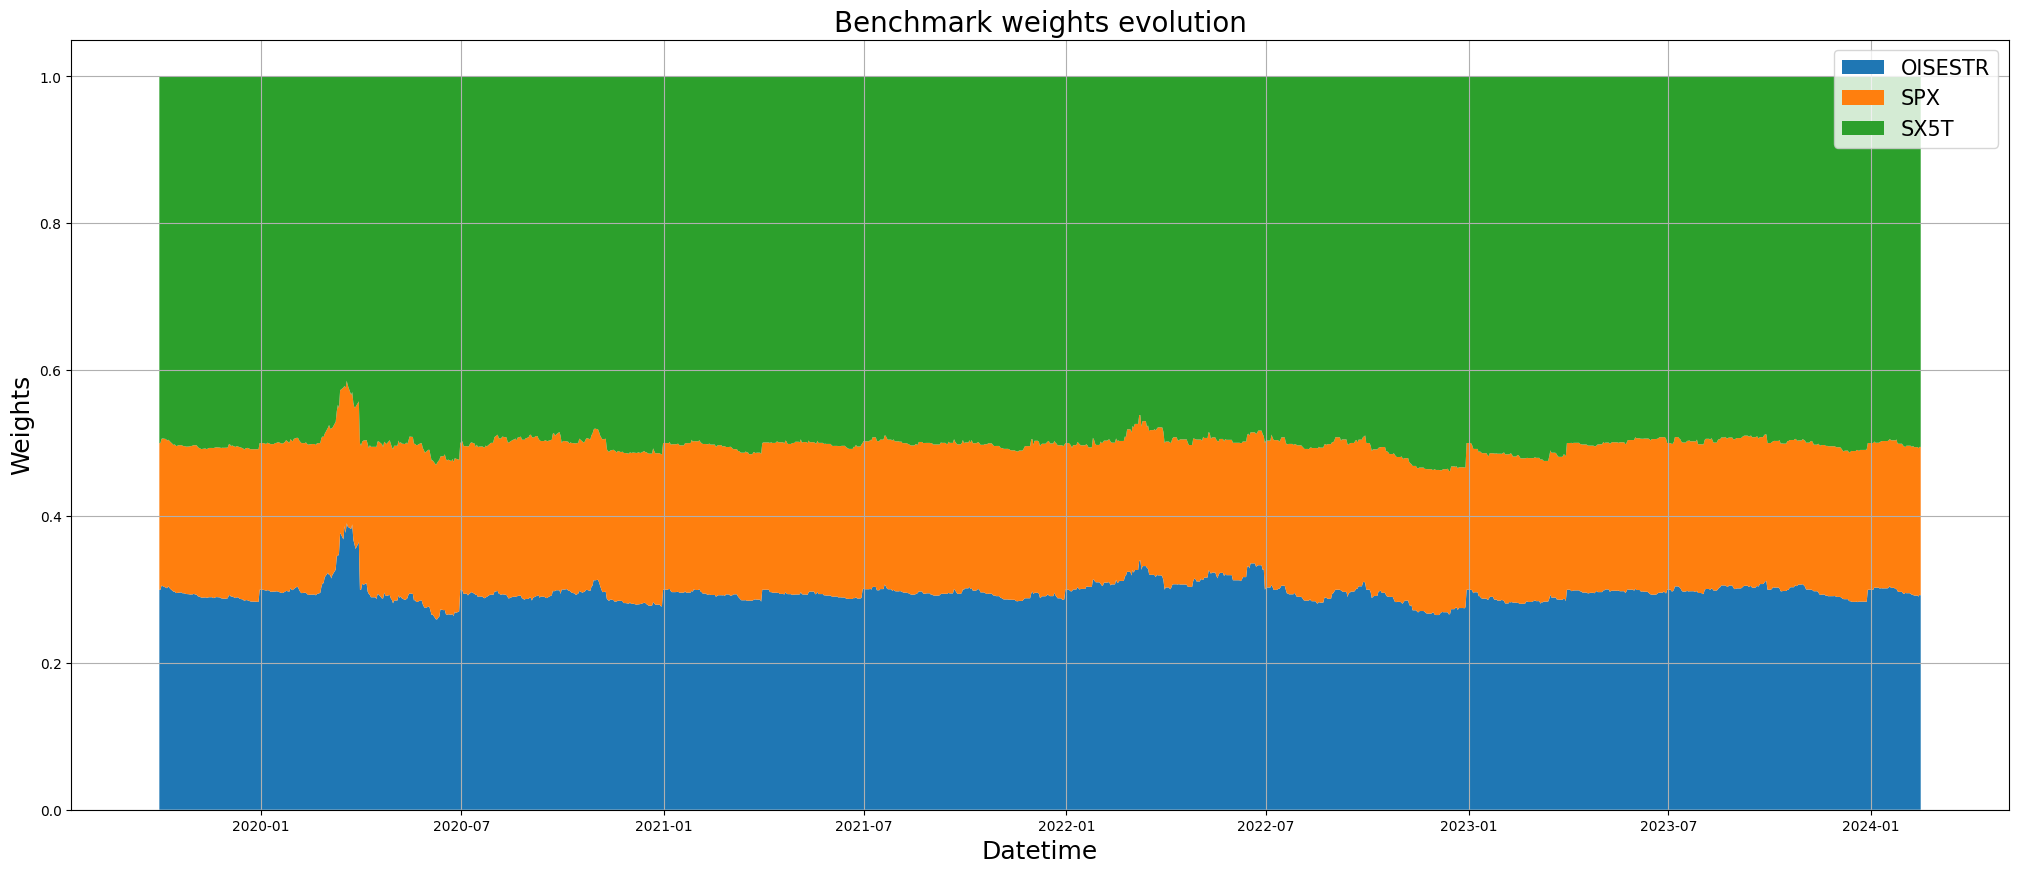

In [10]:
plt.figure(figsize=(25, 10))
plt.stackplot(
    weights_df.index,
    weights_df.to_numpy().T,
)
plt.xlabel("Datetime", fontsize=18)
plt.ylabel("Weights", fontsize=18)
plt.title("Benchmark weights evolution", fontsize=20)
plt.grid()
plt.legend(weights_df.columns.to_list(),fontsize=15)
plt.show()